## What is recommender system ?
- A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications. 

#### Make Sense...?
- Okay, Let's try to practice to find a few more examples. This work tries to make a recommendation system to decide the right vehicle that you want to buy

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Predicition Model For Car Price"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'Cleaned_Car_data.csv', 'LinearRegressionModel.pkl', 'Prediction Analysis.ipynb', 'quikr_car.csv', 'Recommendation System.ipynb']


In [2]:
Data = pd.read_csv("../Predicition Model For Car Price/Cleaned_Car_data.csv")

### We are using same dataset which is already cleaned in Prediction Analysis

- The oringinal dataset is quikr.csv which is cleaned in Prediction Analysis(i.e. For Predicting Price of Car) by the name of Cleaned_Car_data.csv

In [3]:
Data.info()
Data[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  816 non-null    int64 
 1   name        816 non-null    object
 2   company     816 non-null    object
 3   year        816 non-null    int64 
 4   Price       816 non-null    int64 
 5   kms_driven  816 non-null    int64 
 6   fuel_type   816 non-null    object
dtypes: int64(4), object(3)
memory usage: 44.8+ KB


,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel
5,5,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
6,6,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
7,7,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
8,8,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
9,9,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


### Car Name  

C:\Users\Amay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


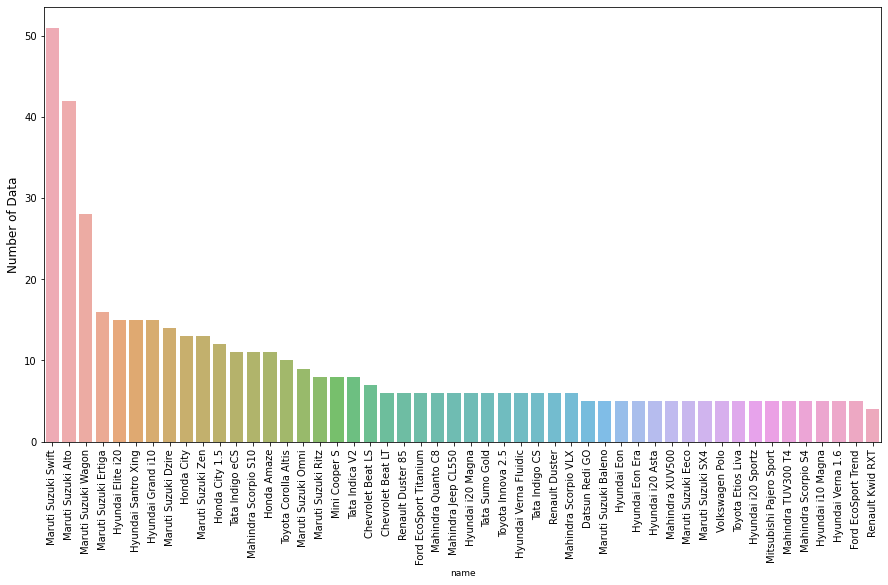

In [4]:
cnt_pro = Data['name'].value_counts()  [:50]
plt.figure(figsize=(15,8))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('name', fontsize=9)
plt.xticks(rotation=90)
plt.show();

### Price By Car Company

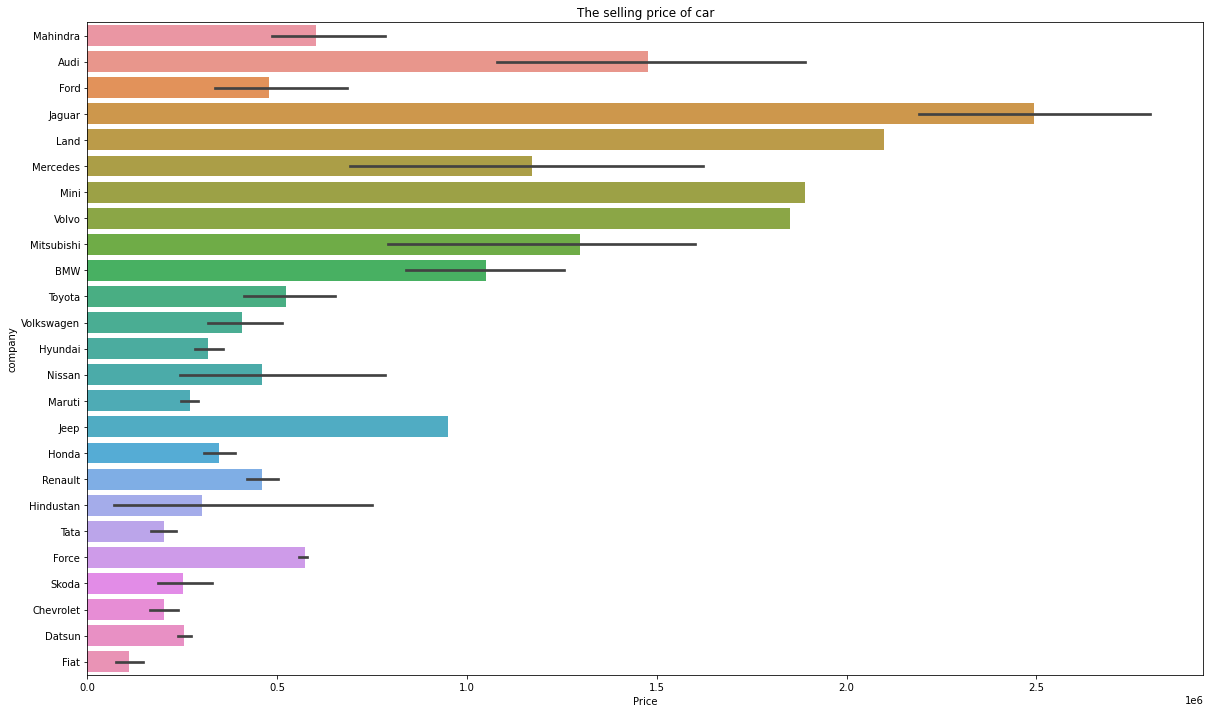

In [5]:
top_sell = Data.sort_values(by='Price', ascending=False)
figure = plt.figure(figsize=(20,12))
sns.barplot(y=top_sell.company, x=top_sell.Price)
plt.xticks()
plt.xlabel('Price')
plt.ylabel('company')
plt.title('The selling price of car')
plt.show()

### Price By Car Year  

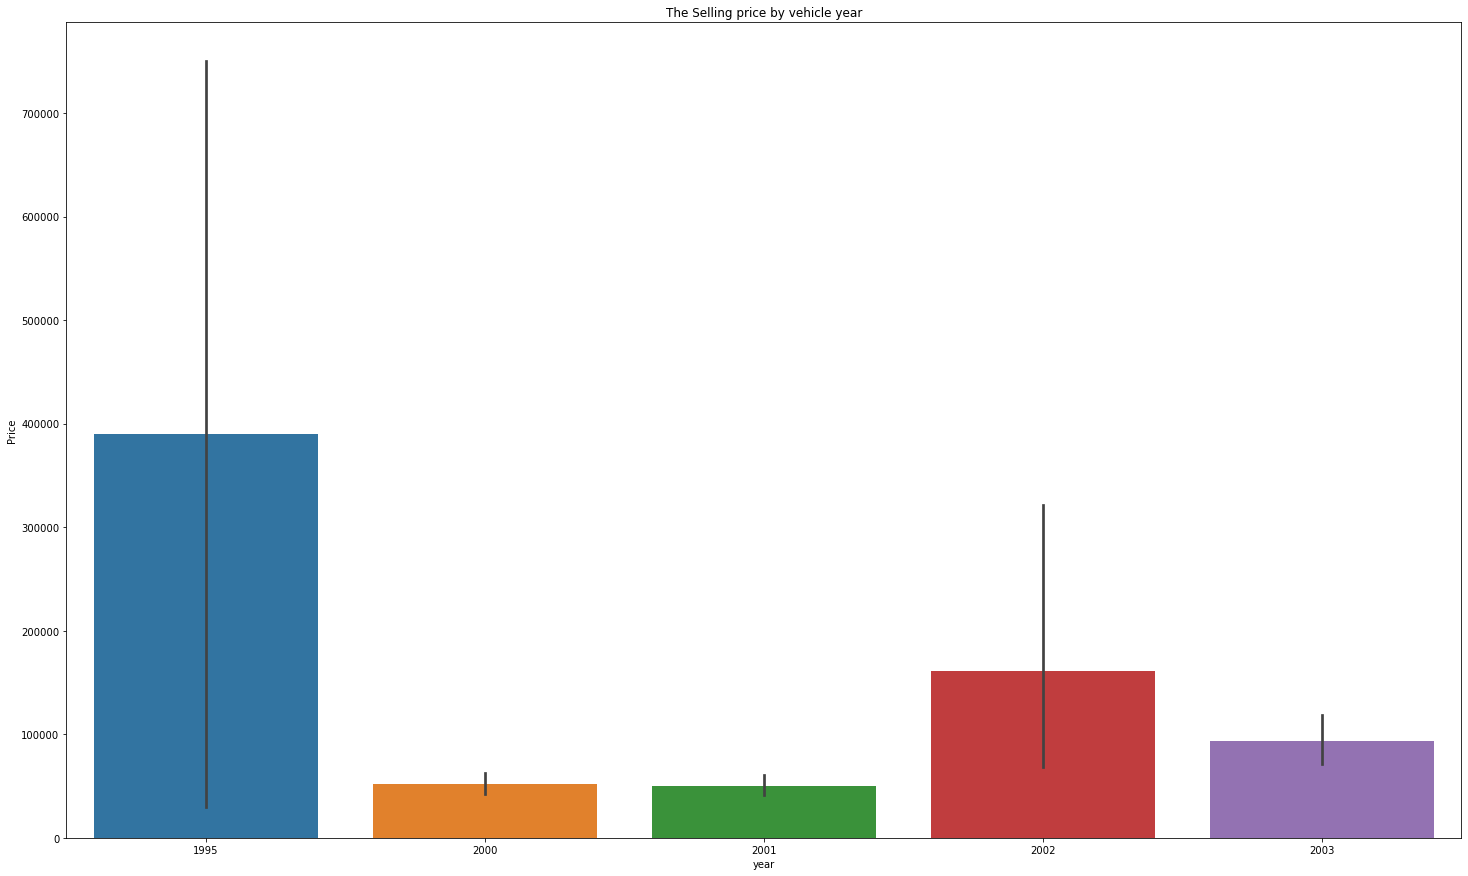

In [6]:
top_sell = Data.sort_values(by='year', ascending=True)[:30]
figure = plt.figure(figsize=(25,15))
sns.barplot(y=top_sell.Price, x=top_sell.year)
plt.xticks()
plt.xlabel('year')
plt.ylabel('Price')
plt.title('The Selling price by vehicle year')
plt.show()

### Comparing Price of Car 

In [7]:
# here we are comparing the selling_price with name (vehicle)
# first group the name and get max,min and avg selling price of the vehicle
display(Data[["name","Price",]].groupby(["name"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Blues"))

C:\Users\Amay\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


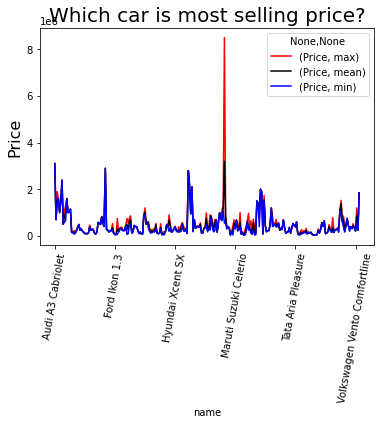

In [8]:
# here we are ploting these values using lineplot
Data[["name","Price",]].groupby(["name"]).agg(["max",'mean',"min"]).plot(kind="line",color =["red","black","blue"])
plt.title("Which car is most selling price?", fontsize=20)
#plt.xticks(np.arange(17),['Maruti Swift Dzire VDI','Maruti Alto 800 LXI','Maruti Alto LXi','Hyundai EON Era Plus','Maruti Alto LX'],rotation=90,fontsize=15)
plt.ylabel("Price",fontsize=16) 
plt.xticks(rotation=80)
#plt.xlabel(" ")
plt.show()

In [9]:
print("History's Best Selling Vehicles")
display(Data.loc[Data.groupby(Data["name"])["Price"].idxmax()][["name","Price"]].style.background_gradient(cmap="copper"))

History's Best Selling Vehicles


,name,Price
678,Audi A3 Cabriolet,3100000
221,Audi A4 1.8,699000
637,Audi A4 2.0,1900000
511,Audi A6 2.0,1599000
14,Audi A8,1000000
424,Audi Q3 2.0,1499000
627,Audi Q5 2.0,2390000
15,Audi Q7,500000
628,BMW 3 Series,1075000
422,BMW 5 Series,1299000


### Time Series Price Cars 

In [10]:
Data['year'] = Data["year"].astype("int")
print('time series selling price cars')
display(Data[["year",'name','Price']].groupby(["name","year"]).agg("sum").sort_values(by="Price",ascending = False).head(10).style.background_gradient(cmap='Greens'))

time series selling price cars


,,Price
name,year,
Mini Cooper S,2013,15128888
Mahindra XUV500 W6,2014,8500003
Mitsubishi Pajero Sport,2015,7705000
Mahindra Scorpio S10,2015,5395000
Mahindra Scorpio S4,2015,4235000
Honda City,2015,3742993
Audi A3 Cabriolet,2015,3100000
Toyota Fortuner 3.0,2015,3050000
Ford Endeavor 4x4,2019,2900000


### Plotting it with Fuel Type 

C:\Users\Amay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


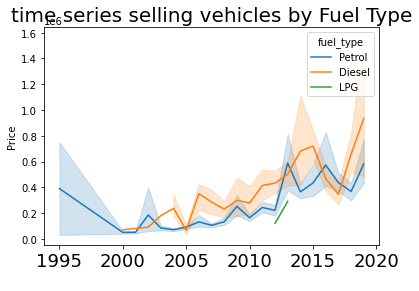

In [11]:
sns.lineplot(Data["year"],Data['Price'],hue=Data["fuel_type"])
plt.title("time series selling vehicles by Fuel Type",fontsize=20)
plt.xticks(fontsize=18)
plt.xlabel(" ")
plt.show()

## 6 things you need to know before buying a vehicle
#### Besides paying attention to financial, if you want buy car you need to know about the car like:
- name
- company
- year
- Price
- kms_driven
- fuel_type

#### Fuel Type

,name,company,year,Price,kms_driven
678,Audi A3 Cabriolet,Audi,2015,3100000,12516
485,Jaguar XE XE,Jaguar,2016,2800000,8500
182,Mini Cooper S,Mini,2013,1891111,13000
70,Mini Cooper S,Mini,2013,1891111,13000
76,Mini Cooper S,Mini,2013,1891111,13500


,name,company,year,Price,kms_driven
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000
771,Ford Endeavor 4x4,Ford,2019,2900000,9000
627,Audi Q5 2.0,Audi,2014,2390000,34000
626,Jaguar XF 2.2,Jaguar,2013,2190000,29000
223,Land Rover Freelander,Land,2015,2100000,30000


,name,company,year,Price,kms_driven


,name,company,year,Price,kms_driven
458,Maruti Suzuki Eeco,Maruti,2013,290000,70000
585,Maruti Suzuki Omni,Maruti,2012,120000,160000


C:\Users\Amay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'fuel_type : km_driven comparsion')

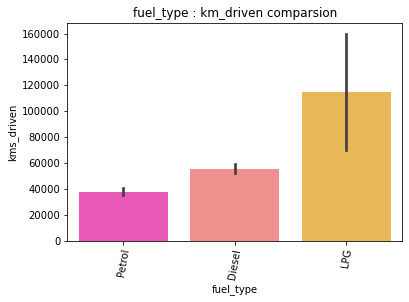

In [12]:
display(Data[Data["fuel_type"]=="Petrol"][["name","company","year","Price","kms_driven"]].sort_values(by="Price", ascending= False).head(5).style.background_gradient(cmap="spring"))

display(Data[Data["fuel_type"]=="Diesel"][["name","company","year","Price","kms_driven"]].sort_values(by="Price", ascending= False).head(5).style.background_gradient(cmap="spring"))

display(Data[Data["fuel_type"]=="CNG"][["name","company","year","Price","kms_driven"]].sort_values(by="Price", ascending= False).head(5).style.background_gradient(cmap="spring"))


display(Data[Data["fuel_type"]=="LPG"][["name","company","year","Price","kms_driven"]].sort_values(by="Price", ascending= False).head(5).style.background_gradient(cmap="spring"))

sns.barplot(Data["fuel_type"],Data["kms_driven"],palette="spring")
plt.xticks(rotation=80)
plt.title("fuel_type : km_driven comparsion")

### Recommeding Car 

### Fuel Type

In [13]:
def recommend_car(x):
    y = Data[["year","fuel_type",'name',"kms_driven","company","Price"]][Data["fuel_type"] == x]
    y = y.sort_values(by="Price",ascending=False)
    return y.head(15)

#### Petrol 

In [14]:
recommend_car("Petrol")

,year,fuel_type,name,kms_driven,company,Price
678,2015,Petrol,Audi A3 Cabriolet,12516,Audi,3100000
485,2016,Petrol,Jaguar XE XE,8500,Jaguar,2800000
182,2013,Petrol,Mini Cooper S,13000,Mini,1891111
70,2013,Petrol,Mini Cooper S,13000,Mini,1891111
76,2013,Petrol,Mini Cooper S,13500,Mini,1891111
285,2013,Petrol,Mini Cooper S,13000,Mini,1891111
286,2013,Petrol,Mini Cooper S,13000,Mini,1891111
240,2013,Petrol,Mini Cooper S,13000,Mini,1891111
260,2013,Petrol,Mini Cooper S,13500,Mini,1891111
288,2013,Petrol,Mini Cooper S,13000,Mini,1891111


#### Diesel 

In [15]:
recommend_car("Diesel")

,year,fuel_type,name,kms_driven,company,Price
534,2014,Diesel,Mahindra XUV500 W6,45000,Mahindra,8500003
771,2019,Diesel,Ford Endeavor 4x4,9000,Ford,2900000
627,2014,Diesel,Audi Q5 2.0,34000,Audi,2390000
626,2013,Diesel,Jaguar XF 2.2,29000,Jaguar,2190000
223,2015,Diesel,Land Rover Freelander,30000,Land,2100000
222,2015,Diesel,Mercedes Benz GLA,20000,Mercedes,2000000
637,2016,Diesel,Audi A4 2.0,44000,Audi,1900000
651,2015,Diesel,Volvo S80 Summum,42000,Volvo,1850000
653,2015,Diesel,Mitsubishi Pajero Sport,37000,Mitsubishi,1725000
511,2012,Diesel,Audi A6 2.0,11500,Audi,1599000


### Company


In [16]:
def recommend_car(x):
    y = Data[["year","fuel_type",'name',"kms_driven","company","Price"]][Data["company"] == x]
    y = y.sort_values(by="Price",ascending=False)
    return y.head(15)

#### Ford

In [17]:
recommend_car("Ford")

,year,fuel_type,name,kms_driven,company,Price
771,2019,Diesel,Ford Endeavor 4x4,9000,Ford,2900000
129,2016,Diesel,Ford EcoSport Trend,24330,Ford,830000
6,2016,Diesel,Ford EcoSport Ambiente,24530,Ford,830000
61,2016,Diesel,Ford EcoSport Ambiente,24530,Ford,830000
282,2016,Diesel,Ford EcoSport Titanium,30000,Ford,599000
720,2014,Diesel,Ford EcoSport Titanium,34000,Ford,590000
523,2017,Petrol,Ford EcoSport Trend,10000,Ford,580000
3,2014,Diesel,Ford EcoSport Titanium,36000,Ford,575000
102,2014,Diesel,Ford EcoSport Titanium,44000,Ford,550000
661,2019,Petrol,Ford Figo Petrol,0,Ford,525000


#### Audi 

In [18]:
recommend_car("Audi")

,year,fuel_type,name,kms_driven,company,Price
678,2015,Petrol,Audi A3 Cabriolet,12516,Audi,3100000
627,2014,Diesel,Audi Q5 2.0,34000,Audi,2390000
637,2016,Diesel,Audi A4 2.0,44000,Audi,1900000
511,2012,Diesel,Audi A6 2.0,11500,Audi,1599000
650,2013,Diesel,Audi A4 2.0,27000,Audi,1510000
424,2013,Diesel,Audi Q3 2.0,37000,Audi,1499000
325,2012,Diesel,Audi A4 2.0,40000,Audi,1350000
14,2017,Petrol,Audi A8,4000,Audi,1000000
221,2009,Petrol,Audi A4 1.8,47000,Audi,699000
236,2009,Petrol,Audi A4 1.8,47000,Audi,699000
